# Santos, Santos, Pacheco Results #
The results achieved in the simulations by SSP (Santos Santos Pachecho) in their paper *Social Norms of Cooperation in Small-Scale Societies* can be seen in the following graph.


<img src="http://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=info:doi/10.1371/journal.pcbi.1004709.g001"/>

One can see an almost constant cooperation index for population sizes greater than 50 for Stern Judging, Shunning, and Image Score. While Simple Standing increases steadily over the range 50-300.

Below we will be performing the same simulation and plotting the results in order to verify and compare the simulations results and those of the paper.

First however let us define the social norms we will use as well as a function to pass varying population sizes and social norms for retrieving the results.

In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2

import SimulationInstance
import SimulationMain
import SimulationInstanceVectorized

SternJudging = [[1, 0 ],
                [0, 1]]
SimpleStanding = [[1, 1],
                  [0, 1]]
Shunning = [[1, 0],
            [0, 1]]
ImageScore = [[1, 1],
              [0, 0]]

def SSP(population_size, socialnorm):
    runs = 2
    generations = 3*np.power(10, 5)
    mutation_rate = np.power(10*population_size, -1)

    execution_error = 0.08
    reputation_assignment_error = 0.01
    private_assessment_error = 0.01
    reputation_update_probability = 0.2
    randomseed = np.random.randint(999999)
    cost = 1
    benefit = 5
    coop_index = SimulationInstanceVectorized.run_instance(runs, generations, population_size,
        mutation_rate, execution_error, reputation_assignment_error, private_assessment_error,
        reputation_update_probability, randomseed, socialnorm,
        cost, benefit)
    return coop_index

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Now let us retrieve the results for populations in the ranges 10-150, with simulations at every multiple of 10, and then simulations at multiples of 25 from 150-300. 

Let's begin with the social norm of Stern Judging.

In [44]:
population_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [43]:
stern_judging_results = [0.862543783,
                        0.851590006,
                        0.825400024,
                        0.795971107,
                        0.66780678,
                        0.746757672,
                        0.657950521,
                        0.712143505,
                        0.68071872,
                        0.605866015,
                        0.642499509,
                        0.561864221,
                        0.613224586,
                        0.628291403,
                        0.510151912]

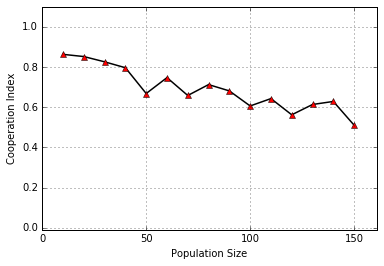

In [46]:
stern_judging_results = np.array(stern_judging_results)
# results_temp_x2
#x = stern_judging_results[:,0]
#y = stern_judging_results[:,1]
plt.plot(population_sizes, stern_judging_results, 'k', population_sizes, stern_judging_results, 'r^', linewidth=1.5)
plt.ylim((-0.01, 1.1))
plt.xlim((-0.01, 161))
plt.ylabel('Cooperation Index')
plt.xlabel('Population Size')
plt.grid(True)
plt.show()

The results of the simulation as shown above do not seem to correlate with those of the paper by santos santos pacheco. However what seems to be the case is that the results of a number of runs seem to be either zero or a value close to 0.8. This means that some proportion of the runs seem to be fixated by defection, unable to recover to a stable cooperative population. While we cannot simply remove the zero values, if we take into account both the cooperation index average with zeros taken into account and the average without, we see the following.

We also look at the proportion of runs which have result in a cooperation index of zero against the total number of runs:

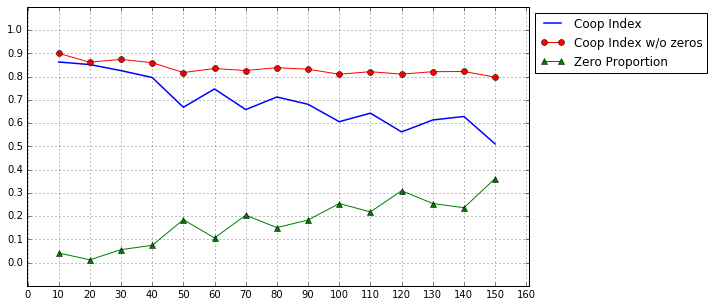

In [85]:
zero_proportion = [0.041204119,0.011695128,0.055576907,0.074147917,0.184125577,0.106000064,0.203717035,0.150397196,0.182914359,0.253814071,0.217844087,0.308822051,0.253973574,0.23594133,0.361354215]
coop_index_wo_zeros = [0.899610443,0.861665664,0.873896568,0.85957966,0.817215502,0.834648333,0.825830196,0.838019033,0.831492822,0.809982779,0.820895779,0.810393501,0.82092734,0.821720803,0.797484074]
line_standard, = plt.plot(population_sizes, stern_judging_results, linewidth=1.5, label='Coop Index')
line_zero_prop, = plt.plot(population_sizes, zero_proportion, label='Zero Proportion', marker='^')
line_wo_zeros, = plt.plot(population_sizes, coop_index_wo_zeros, label='Coop Index w/o zeros', marker='o')
plt.ylim((-0.1, 1.1))
plt.xlim((-0.1, 161))
plt.legend(handles=[line_standard, line_wo_zeros, line_zero_prop], loc='upper left', bbox_to_anchor=(1,1))
plt.grid(b=True, which='both')
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 5
plt.xticks([10*i for i in range(17)])
plt.yticks([0.1*i for i in range(11)])
plt.show()